#**"FoodHub" (Food Delivery Service) Data Analysis**

##**Problem Definition**

###**The Context - What is FoodHub?**

A food aggregator company, FoodHub, offers access to multiple restaurants through a single smartphone app. FoodHub earns money by collecting a fixed margin of the delivery order from the restaurants.

The app workflow is as follows:
> 1. Restaurants to receive a direct online order from a customer.
2. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant.
3. The delivery person then uses the map to reach the restaurant and waits for the food package.
4. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food.
5. The delivery person confirms the drop-off in the app after delivering the food package to the customer.
6. The customer can rate the order in the app (optional).

###**The Objective - How can FoodHub increase profits?**

> * Perform Exploratory Data Analysis (univariate and bivariate) on FoodHub's data set to determine patterns/trends in the data that FoodHub can utilize as tools for company growth.

###**The Key Questions**<br>
> * What patterns or trends does FoodHub's customer spending reveal?
* What is the customer demand for certain restaurants?
* How can the customer experience be improved?
* Should FoodHub consider promotional incentives to gain additional business?

## **Key Findings and Business Recommendations**

###**Key Findings**
* Approx. **1 in 5** customers are **repeat customers**, and ~40% of orders are from single-time customers.  This suggests that FoodHub  is successfully reaching new, or "first time", customers, but has an **opportunity to retain repeat customers**.

* **~40% of orders were not rated** by customers, suggesting that order ratings are not a priority to the customer.
* A **majority of order costs are <$20** (~60% of total orders).  FoodHub has opportunity to increase profits by **increasing the total order costs**.  Increasing the percentage of FoodHub revenue per order may de-incentivise small business participation.
* Weekend orders are **2.5x more prevelent** than weekday orders.  FoodHub has the opportunity to grow business during weekdays to increase profits.


###**Business Recommendations**
* Target marketing to **incentivise returning customers** to sustain profits within current customer market.

* **Continue restaurant promotional incentives based upon customer ratings** so that FoodHub recommendation algorithms can be optimized.
* Run **promotional campaigns to customers** offering discounts on orders >$20 to **increase customer spending per order**.
* Capture weekday market by **offering promotional deals valid during weekdays**.


## **Data Set Description**


###**Data Dictionary:**

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

###**Import Libraries and Mount Google Drive**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings as warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount google drive to import data file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Data Pre-processing**

####**Load and view data file**

In [ ]:
# read the data, update file path from default code to correct location of CSV file (user dependent)
df = pd.read_csv('/content/drive/MyDrive/ADSP_Project1_FDS/foodhub_order.csv')

# use .head() syntax to preview first 5 rows of data set to confirm correct file is loaded and confirm columns of data referenced in data dictionary above
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Explore data set (shape, dtypes, duplicates, nulls)**

In [ ]:
# check shape of data set

df.shape
print("There are", df.shape[0], "rows of data, and", df.shape[1], "columns of data in the data set.")

There are 1898 rows of data, and 9 columns of data in the data set.


In [ ]:
# check dtypes in data set
# Use info() to print a concise summary of the DataFrame

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# can also check for duplicates
df.duplicated().sum()

0

In [ ]:
# check for missing values

print(df.isnull().sum())
print('')
print("There are no missing values in the data set.")

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are no missing values in the data set.


###**Observations:**

> * The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* There are **1898 rows** of data and **9 columns** of data in the data set.  Each row corresponds a single order placed by an individual customer and includes data for each category in the data dictionary.
* There are 3 data types: **float** (float64), **integer** (int64), and **object**.
* There are **no duplicate rows** and **no null values** in the data set.

### **Statistical summary**

#### **View summary table(s)**

In [ ]:
# use '.describe().T' to create transposed statistical summary table for reference
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
df.describe(exclude = 'number').T   # add 'exclude = 'number'' to return statistics on nominal data (objects)

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [ ]:
# create data frame variable 'df_stats_summary' and use '.loc' function to pull specific data from stats summary table
df_stats_summary = pd.DataFrame(df.describe().T)
df_stats_summary.loc[['food_preparation_time'], ['min', 'mean', 'max']]

,min,mean,max
food_preparation_time,20.0,27.37197,35.0


In [ ]:
# remember that 'not rated' does not equal 'missing' data (NaN values)
# use '.value_count()' function to determine what subcategories of data entries are present in the 'rating' column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# calculate percentage of order not rated
np.round((736 / df.shape[0] * 100), 2)

38.78

### **Observations**:  
> * It takes an **average of 27 min** for food to be prepared once an order is placed.
* **Shake Shack** is the most frequently ordered restaurant (219 records).
* **75%** of customers are spending **<$23 per order**.
* A majority of orders (71%) are placed on the **weekend**.
* **Ratings were not given for 736 orders** (39% of total orders).  FoodHub may wish to understand factors for high frequency of unrated orders if relevent to business needs.

# **Exploratory Data Analysis (EDA)**

## **Univariate Analysis**
* Develop insights on data distribution per each variable
* Develop insights on customer spending patterns/trends

####**Check unique values**

In [ ]:
df['order_id'].nunique()  # check number of unique order IDs

1898

In [ ]:
df['customer_id'].nunique()   # only 1200 unique customer IDs, which means that some customers have ordered >1 occurance

1200

In [ ]:
# calculate percentage of repeat customers
df['customer_id'].value_counts()                                                # return value_counts() per unique 'customer_id'
repeat_customers = pd.DataFrame([df['customer_id'].value_counts()>1]).T         # create new data frame assigned T/F to counts > 1
repeat_customers = pd.DataFrame(repeat_customers['customer_id'].value_counts()) # reassign 'repeat_customers' data frame to include total counts of T/F
total_repeat_customers = repeat_customers.loc[True]['customer_id']              # define variable to represent total number of repeat customer IDs

percent_repeat = (total_repeat_customers) / (df.shape[0]) * 100                 # calculate percentage of repeat customers
print("The total percentage of repeat customers in the data set is {0}%".format(np.round(percent_repeat, 2)))   # generate print statement


The total percentage of repeat customers in the data set is 21.92%


In [ ]:
# calculate what percentage of orders were from single time customers
single_time_customers = float(repeat_customers.loc[False]['customer_id'])      # define variable to represent single time customers

# assume that 1 single time customer represents 1 order ID (no repeats of customer ID per order ID)
total_orders = float(df.shape[0])                                              # define variable to represent total orders
percent_single_time = (single_time_customers) / (total_orders) * 100           # calculate percentage of order from single time customers
print("{0}% of total orders were from single time customers.".format(np.round(percent_single_time, 2)))


41.31% of total orders were from single time customers.


In [ ]:
df['restaurant_name'].nunique()   # 178 unique restaurant names out of 1898 orders, some customers prefer certain restaurants

178

In [ ]:
df['restaurant_name'].value_counts()    # return value_counts() per unique 'restaurant_name'
shake_shack_freq = 219                  # create variable for number of orders for Shake Shack (top in value_counts() at 219 frequencies)
percentage_shake_shack = shake_shack_freq / df.shape[0] * 100   # calculate percentage of orders as Shake Shack
print("Shake Shack occurs for {0}% of total orders.".format(np.round(percentage_shake_shack, 2)))   # generate print statement

Shake Shack occurs for 11.54% of total orders.


In [ ]:
df['cuisine_type'].nunique()    # 14 unique cuisine types, FoodHub may want to increase or decrease cuisine variety

14

In [ ]:
df['cuisine_type'].value_counts()   # return value_counts() for each unique 'cuisine_type'

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

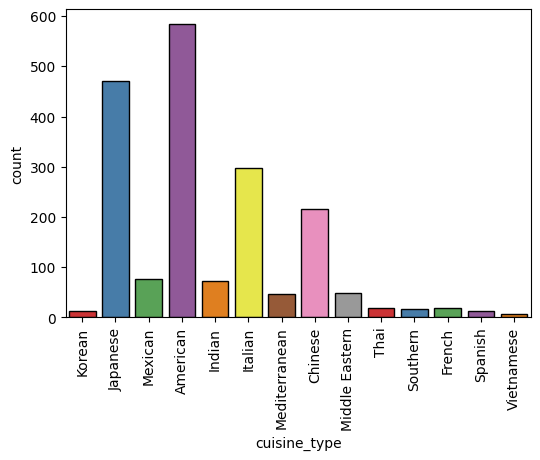

In [ ]:
plt.figure(figsize = (6,4))         # define figure size of plot
sns.countplot(data = df,            # define data frame
              x = 'cuisine_type',   # set x-axis to 'cuisine_type' column
              palette = 'Set1',     # change default color palette for visualization purposes
              edgecolor = 'black')  # add black boarder to data bars for visualization purposes
plt.xticks(rotation = 90);          # rotation x-tick labels for legibility

####**Visualize numerical data**

In [ ]:
# create series of subplots to show histogram/box plots for numerical data
# begin with defining function to create boxplot and histogram plot for numerical columns

def box_hist(column_name, figsize=(6,4), bins="auto"):    # define function 'box_hist' with one input 'column_name'
    f, (ax_box, ax_hist) = plt.subplots(                  # create subplot figure using 2 plots: ax_box, ax_hist
        nrows = 2,                                        # define orientation of subplot, stack plots vertically (# of rows = 2)
        sharex = False,                                   # define 'sharex = False' so plots have individual x-axes
        gridspec_kw={"height_ratios": (.25, .75)},        # define ratio of plot heights (formatting purposes)
        figsize=figsize)                                  # define subplot figsize to refernence 'box_hist' function of (6,4)

    sns.boxplot(x=column_name,    # create boxplot with 'x = column_name' in data frame
                ax=ax_box,        # define 'ax' variable for subplot function
                showmeans=True,   # add green triangle on boxplot to show average data value in 'column_name'
                color='r')        # set boxplot color to red

    sns.histplot(x=column_name,   # create histogram with 'x = column_name' in data frame
                 kde=True,        # set 'kde = True' to add KDE line to histogram to help visualize distribution of data
                 ax=ax_hist,      # define 'ax' variable for subplot function
                 bins=bins)       # set number of bins to reference 'box_hist' function, 'bins = 'auto''

    ax_hist.axvline(np.mean(column_name), c='g', linestyle='--')        # add vertical line to histogram to visualize average data value (green, dashed line)
    ax_hist.axvline(np.median(column_name), c='black', linestyle='-')   # add vertical line to hisotgram to visualize median data value (black, solid, line)

    plt.show()    # show subplot

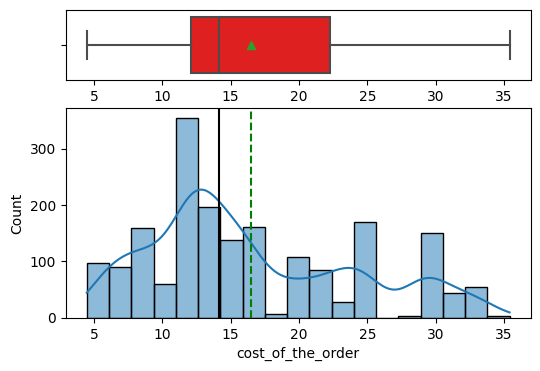

In [ ]:
box_hist(df.cost_of_the_order)    # histogram of order costs may show slight right skew

In [ ]:
cost_morethan30 = pd.DataFrame(df['cost_of_the_order'] >= 30)                         # create new data frame with T/F values for order cost >= 30
cost_morethan30 = pd.DataFrame(cost_morethan30['cost_of_the_order'].value_counts())   # return new data frame with value counts for T/F
total_cost_morethan30 = cost_morethan30.loc[True]['cost_of_the_order']                # create variable for total number of orders that cost >= 30

percentage_orders_morethan30 = (total_cost_morethan30) / (df.shape[0]) * 100          # calculate percentage of orders that cost >= 30
print("The percentage of orders costing greater than or equal to $30 is {0}%".format(np.round(percentage_orders_morethan30, 2)))    #generate print statement

The percentage of orders costing greater than or equal to $30 is 5.27%


In [ ]:
df['day_of_the_week'].value_counts()
# more orders occur during the weekend than the weekday, despite weekday having more opportunity for orders (5 days, Monday-Friday) vs weekends (2 days, Sat/Sun)

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# calculate ratio of weekend to weekday orders
weekend_orders = 1351   # define variable for total number of weekend orders
weekday_orders = 547    # define variable for total number of weekday order
day_ratio = weekend_orders / weekday_orders   # calculate ratio of weekend to weekday orders
day_ratio

2.469835466179159

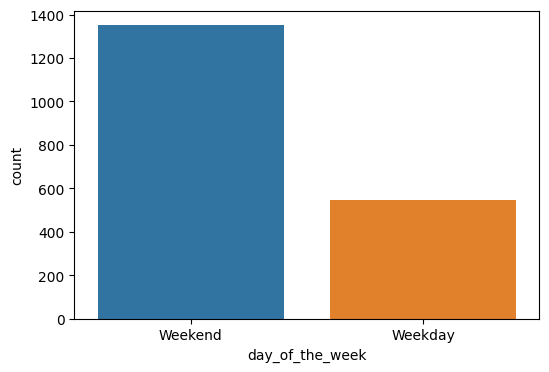

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'day_of_the_week');

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# calculate percentage of 'Not given' ratings
rating_notgiven = 736     # define total number of 'Not given' ratings
percentage_notgiven = rating_notgiven / df.shape[0] * 100
print("{0}% of total orders were not rated.".format(np.round(percentage_notgiven, 2)))

38.78% of total orders were not rated.


In [ ]:
# calculate percentage of ratings between 4 and 5
rating_5 = 588    # define total number of ratings = 5
rating_4 = 386    # define total number of ratings = 4
rating_greaterthan3 = rating_5 + rating_4   # calculate total number of ratings >=4

percentage_greaterthan3 = rating_greaterthan3 / df.shape[0] * 100   # calculate percentage of orders with reatings >= 4
print("{0}% of total orders were rating either a 4 or 5.".format(np.round(percentage_greaterthan3, 2)))   # generate print statement

51.32% of total orders were rating either a 4 or 5.


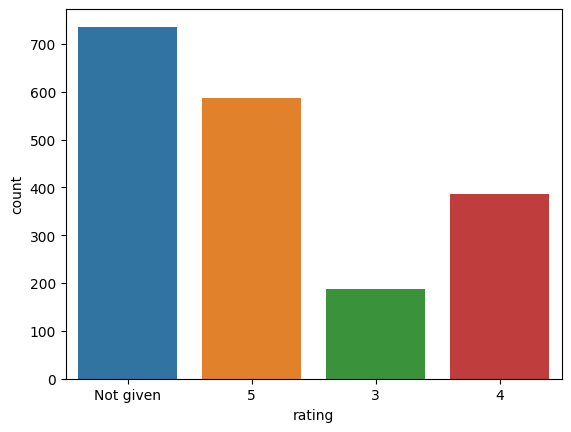

In [ ]:
sns.countplot(data = df, x = 'rating');

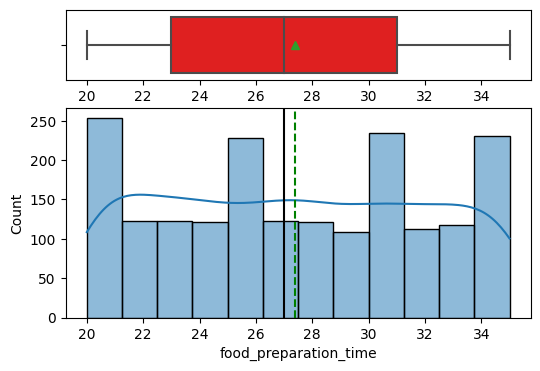

In [ ]:
box_hist(df.food_preparation_time)

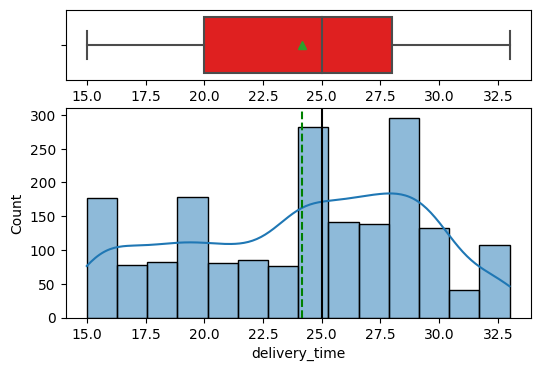

In [ ]:
box_hist(df.delivery_time)

####**Develop insight on customer trends**

In [ ]:
# find most popular restaurants by order count
df['restaurant_name'].value_counts().head(10)   # return '.value_counts()' on 'restaurant_name' column

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

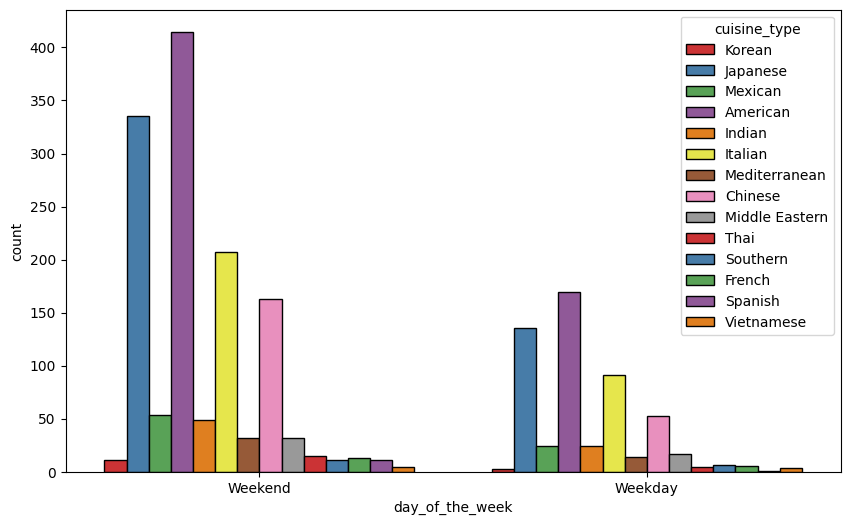

In [ ]:
# determine if weekend vs weekend spending patterns are present
plt.figure(figsize = (10,6))          # adjust size of plot to accommodate legend
sns.countplot(data = df,              # data souce
              x = 'day_of_the_week',  # define 'day_of_the_week' column as the x-axis
              hue = 'cuisine_type',   # define subcategory as 'cuisine_type'
              edgecolor = 'black',    # add border to bars to improve visualization
              palette = 'Set1');      # change color palette to improve visualization

In [ ]:
# determine percentage of orders that cost >$20
cost_morethan20 = pd.DataFrame(df['cost_of_the_order']>20).value_counts()             # create new data frame with assigned True/False values for cost > 20
print('The total number of orders costing more than $20 is', cost_morethan20[True])   # print statement with total number of 'cost_morethan20' == True
per_morethan20 = (cost_morethan20[True] / len(df['cost_of_the_order']) * 100)         # define percentage variable as 'total number of orders with cost > 20' / 'total number of orders' * 100
print('The percentage of orders that cost more than $20 is {0}%.'.format(np.round(per_morethan20, 2)))    # print statement with formatted 'per_morethan20' variable

The total number of orders costing more than $20 is 555
The percentage of orders that cost more than $20 is 29.24%.


In [ ]:
# determine average delivery time
avg_delivery = df['delivery_time'].mean()     # define 'avg_delivery' variable as the mean of the 'delivery _time' column in the data set
print('The average delivery time is {0} minutes'.format(np.round(avg_delivery)))    # create print statement with rounded average delivery time

# alternatively, can look at stats summary table in cell[7] to determine mean order delivery time

The average delivery time is 24.0 minutes


In [ ]:
# determine most frequenct customers
df['customer_id'].value_counts()    # return frequency of orders per 'customer_id' in data set

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

## **Observations on Single Variables**:
**'order_id'**
> * Every order has a unique ID number.
> * There are 1898 total orders in the data set

**'customer_id'**
> * There are 1200 unique customer IDs.
> * Not every order was made by new customer, **~ 22% of the total customers are repeat customers**.
> * **~ 41% of the total orders** are from **single time** customers.

**'restaurant_name'**
> * There are 178 unique restaurants in the data set.
> * Approx. **1 in 10 orders** were for **Shake Shack** (~ 11.5% of total orders)

**'cuisine_type'**
> * There are 14 unique cuisine types.
> * The **three most popular** types of cuisine ordered are:
>> 1. **American** (584 orders)
>> 2. **Japanese** (470 orders)
>> 3. **Italian** (298 orders)

**'cost_of_the_order'**
> * **50%** of the total orders cost **less than 15** dollars, and **75%** of the total orders cost **less than 25** dollars.
> * The **average cost of an order is ~16.50 dollars**, which is slightly influced by a few high cost orders that were 30 dollars or more (only ~ 5% of total orders)

**'day_of_the_week'**
> * There are more than double the amount of weekend orders than weekday orders.  **For every weekday order, there are ~ 2.5 weekend orders**.

**'rating'**
> * **~ 39%** of total orders were **not rated**.
> * No orders were rated < 3.
> * ~ 51% of all orders received a rating of 4 or 5.

**'food_preparation_time'**
> * The distribution of time it takes to prepare the food for the order is relatively uniform, with a minimum time of 20 min and a maximum time of 35 min.  **No significant outliers**.

**'delivery_time'**
> * There are **no significant outliers** in delivery time, with 50% of total orders taking at least 25 min to deliver.

## **Observations on Customer Spending Patterns**:  
* The **Top 5** most popular restaurants are:
> 1. Shake Shake (219 orders)
> 2. The Meatball Shop (132 orders)
> 3. Blue Ribbon Sushi (119 orders)
> 4. Blue Ribbon Fried Chicken (96 orders)
> 5. Parm (68 orders)

* The **most popular** cuisine on the **weekends** is **American** cuisine.
* **~29%** of orders have a **total cost of >$20**.
* The **average delivery time** for orders is ** ~24 minutes**.

* **Top 3 customers** are:
> 1. Customer #52832 - 13 orders
> 2. Customer #47440 - 10 orders
> 3. Customer #83287 - 9 orders




## **Multivariate Analysis**
* Explore relationships between variables in data set

### **Data Visualization (boxplots, heatmaps)**

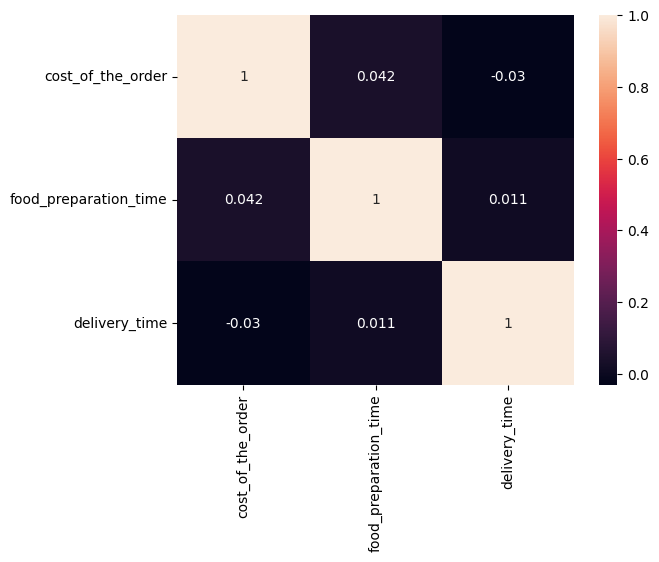

In [ ]:
# generate heatmap of correlation between numerical variables
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']   # define list of numerical data frame columns
corr_num = df[num_var].corr()        # define correlation data frame 'corr_num'

sns.heatmap(corr_num, annot = True);    # plot heatmap with annot = True to get correlation values on map

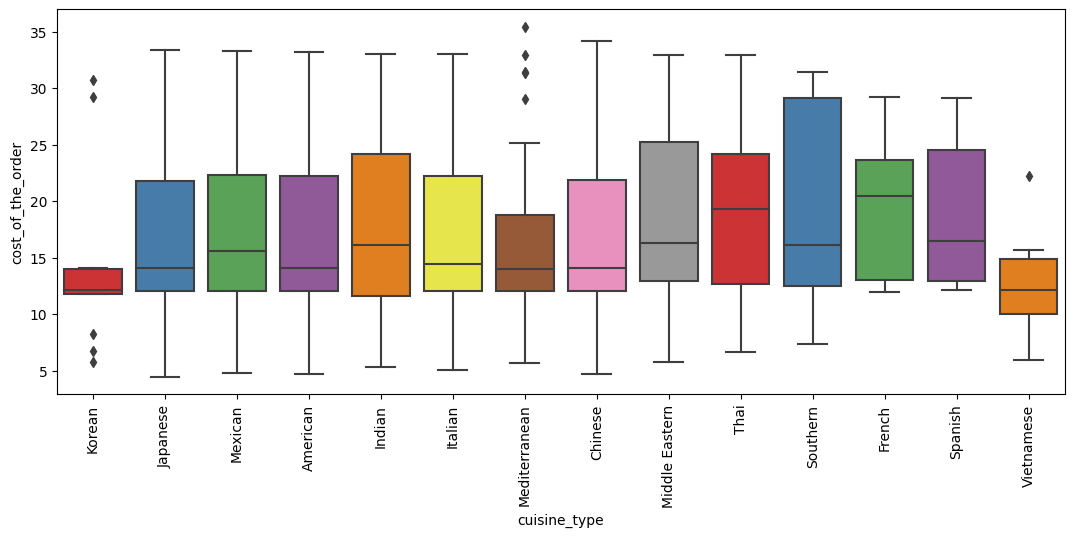

In [ ]:
# check for relationship between 'cuisine_type' and 'cost_of_the_order'
plt.figure(figsize = (13,5))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

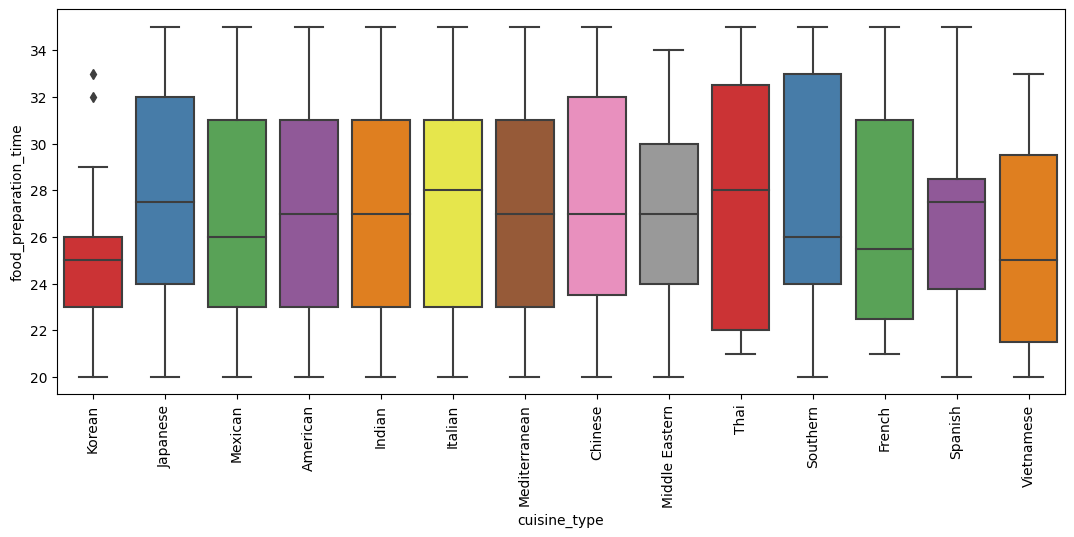

In [ ]:
# check for relationship between 'cuisine_type' and 'food_preparation_time'
plt.figure(figsize = (13,5))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

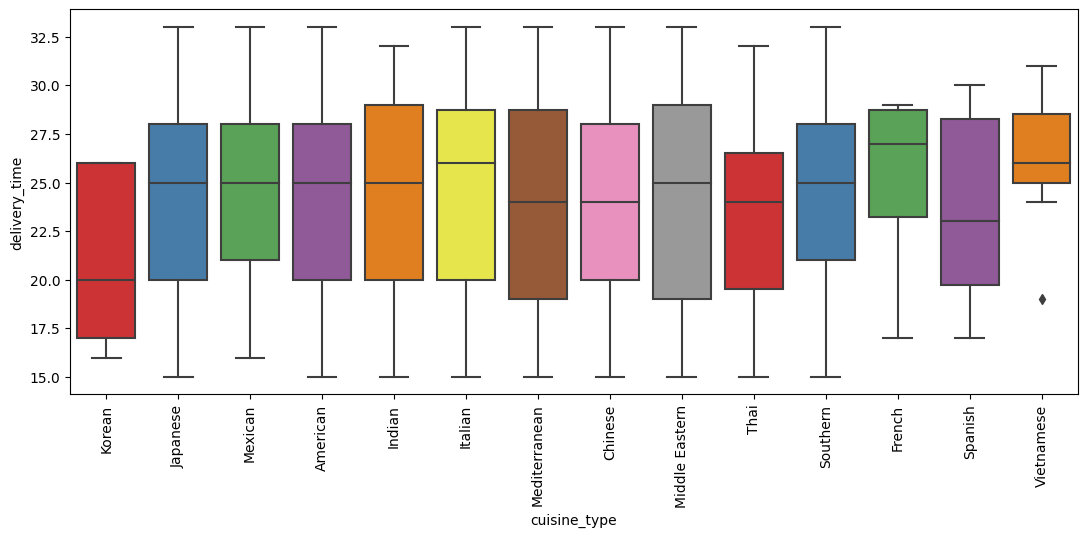

In [ ]:
# check for relationship between 'cuisine_type' and 'delivery_time'
plt.figure(figsize = (13,5))
sns.boxplot(x = 'cuisine_type', y = 'delivery_time', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

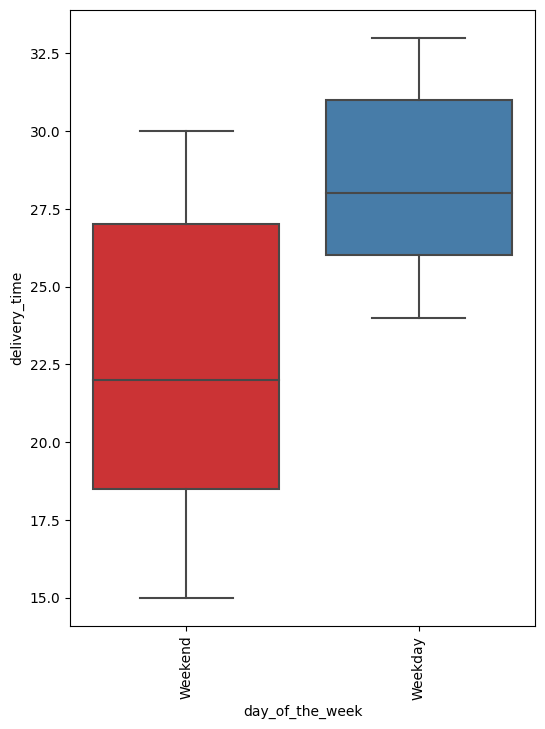

In [ ]:
# check for relationship between 'Day_of_the_week' and 'delivery_time'
plt.figure(figsize = (6,8))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

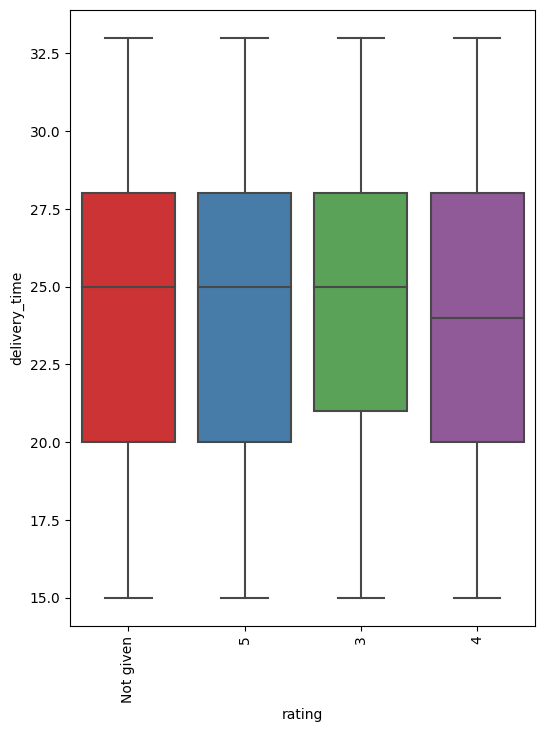

In [ ]:
# check for relationship between 'rating' and 'delivery_time'
plt.figure(figsize = (6,8))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

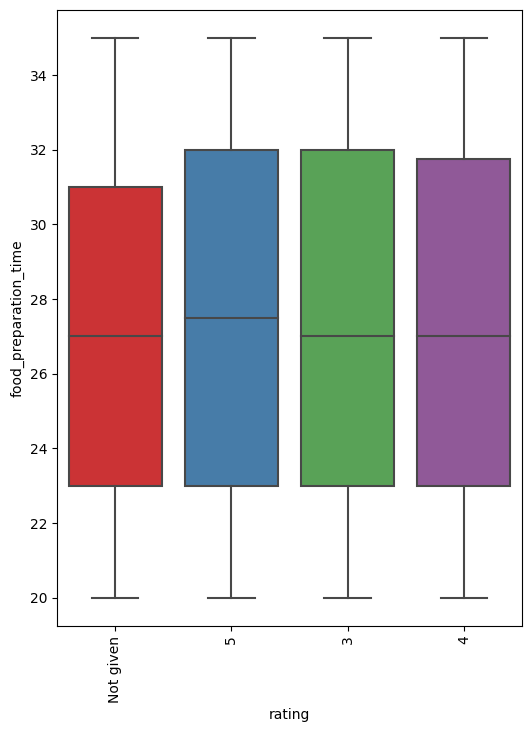

In [ ]:
# check for relationship between 'rating' and 'food_preparation_time'
plt.figure(figsize = (6,8))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

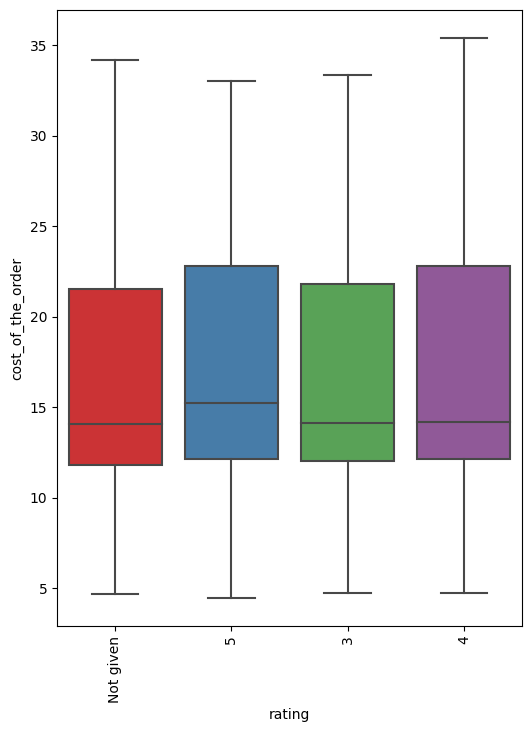

In [ ]:
# check for relationship between 'rating' and 'cost_of_the_order'
plt.figure(figsize = (6,8))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df, palette = 'Set1')
plt.xticks(rotation = 90);

## **Observations on Variable Correlation**:
* There are **no discernable correlations between majority of variables** in data set.
* Data suggests that **delivery time** is **longer during weekdays** compared to weekends.  This **may be due to lack of driver availability** during the week.

#**Answer Targeted Business Questions:**


##**Promo Offers**<br>
The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

* The following restaurants are **eligible** for the promotional offer:
> 1. Blue Ribbon Fried Chicken, 64 total ratings, avg rating = 4.33
> 2. Blue Ribbon Sushi, 73 total ratings, avg rating = 4.22
> 3. Shake Shack, 133 total ratings, avg rating = 4.28
> 4. The Meatball Shop, 84 total ratings, avg rating = 4.51

In [ ]:
# determine which restaurants qualify for FoodHub promo offer
df2 = df.copy()   # copy original data set
df2_remove_notgiven = df2.drop(df[df['rating'] == 'Not given'].index, inplace = True)   # drop rows with 'Not given' data value in 'rating' column
df2.reset_index(drop = True)    # reset row index
print(df2['rating'].value_counts())   # check value counts for 'day_of_the_week' to confirm drop of 'Not given' values
print('-' * 50)

df3 = [df2.groupby('restaurant_name')['rating'].aggregate('count')]   # create new data frame with total number of ratings by restaurant
df3 = pd.DataFrame(df3).T     # format so that 'rating' and 'restaurant_name' are columns
df3_remove_lessthan50 = df3.drop(df3[df3['rating'] <= 50].index, inplace = True)    # drop rows where 'rating' count is <= 50
df3 = df3.reset_index()   # reset index labels starting with 0
print(df3)    # check data frame contains only restaurants with > 50 ratings
print('-' * 50)

df3_morethan50_ratings = df3['rating'] > 50   # confirm expected number of restaurants with > 50 ratings is 4
print(df3_morethan50_ratings.value_counts())
print('-' * 50)

company_promo = df3['restaurant_name'].values.tolist()
df2['rating'] = df2['rating'].astype(int, copy = True)

for i in company_promo:
    avg_rating = df2.loc[df2['restaurant_name'] == i].mean()
    print("The average rating of", i, "is", np.round((avg_rating[3]), 2))

5    588
4    386
3    188
Name: rating, dtype: int64
--------------------------------------------------
             restaurant_name  rating
0  Blue Ribbon Fried Chicken      64
1          Blue Ribbon Sushi      73
2                Shake Shack     133
3          The Meatball Shop      84
--------------------------------------------------
True    4
Name: rating, dtype: int64
--------------------------------------------------
The average rating of Blue Ribbon Fried Chicken is 4.33
The average rating of Blue Ribbon Sushi is 4.22
The average rating of Shake Shack is 4.28
The average rating of The Meatball Shop is 4.51


##**Net Revenue**<br>
The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

 * The **net revenue** generated by the company across all orders in the data set is **$6,166.30**.

In [ ]:
# determine net revenue for all orders
company_charge_per_order = []       # create empty list to place new values generated from if/elif/else statement
for i in df['cost_of_the_order']:   # create for loop for 'cost_of_the_order' column in data frame
    if i > 20.00:                             # begin code for if/elif/else statement
        company_charge_25per = (i * 0.25)     # define 'company_charge_25per' variable for orders > $20.00
        company_charge_per_order.append(company_charge_25per)     # append new value for variable to blank list
    elif i <= 20.00 and i > 5.00:
        company_charge_15per = (i * 0.15)     # define 'company_charge_15per' variable for orders > $5.00 and <= $20.00
        company_charge_per_order.append(company_charge_15per)     # append new value for variable to company_charge_per_order list
    else:
        None    # end if/elif/else statement, exclude all values for i that do no fit within if and elif statements

company_charge_arr = np.array(company_charge_per_order)   # convert list to array
net_revenue = company_charge_arr.sum()    # perform sum calculation on array to return net revenue for company

print('The net revenue generated by the company from orders given in the data set is', np.round(net_revenue, decimals = 2))

The net revenue generated by the company from orders given in the data set is 6166.3


## **Delivery Time**<br>
FoodHub wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

* Approximately **11% of orders take longer than 60 minutes** to be delivered after the customer has placed an order.

<br>

The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

* The delivery time on the **weekdays is ~28 minutes**, whereas on the **weekends it is ~ 22 minutes**.

In [ ]:
# create new column in data set that combines 'food_preparation_time' and 'delivery_time'
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_time_morethan60 = []
for i in df['total_time']:
    if i > 60:
        total_time_morethan60.append(i)
    else:
        None
print("Number of orders that have total time > 60 min:", len(total_time_morethan60))
per_morethan60 = np.round((len(total_time_morethan60) / len(df) * 100), 2)
print("The percentage of orders that take longer than 60 minutes once the order is placed is", per_morethan60)

Number of orders that have total time > 60 min: 200
The percentage of orders that take longer than 60 minutes once the order is placed is 10.54


In [ ]:
# determine difference in deliver time between weekend and weekdays
df.groupby(['day_of_the_week'], observed = True)['delivery_time'].mean()
# group data values by 'day_of_the_week' subcategories and calculate the average value of the 'delivery_time' parameter in each grouping (weekdays and weekends)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

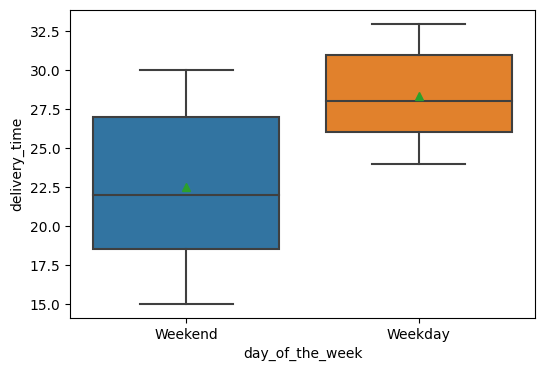

In [ ]:
# plot data to visualize distribution and double check if results in cell[114] make sense
plt.figure(figsize = (6,4))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', showmeans = True);

# **Conclusion and Recommendations**

## **Conclusions**:
*  The top three cuisine types ordered by customers are **American**, **Japanese**, and **Italian**.
* Orders are placed **2.5x more frequently on the weekend**.
* **~ 41%** of all orders were from **single time customers**, with **~ 22% repeating customers**.
* A large portion of customers are **not rating** their orders (~40%)

## **Recommendations**:

*  FoodHub has opportunity to **grow business in less popular cuisine types** and **grow business during weekdays**.
> 1. FoodHub can promote special promotions during the week to generate orders during weekdays.
> 2.  FoodHub can potentially reduce total number of 'Not given' ratings by further communicating its advertising promotion with restaurants based on total number of ratings and average rating.

* FoodHub may wish to further study the variable of single use and return customers to **identify if repeat customer percentage can be increased**.